# デフォルトインポート

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')

%matplotlib inline
sns.set()

# データの読み込み

In [2]:
# テストデータ連結
# df1 = pd.read_csv('data/gender_submission.csv')
# df2 = pd.read_csv('data/test.csv')
# df = pd.merge(df1,df2, on='PassengerId')
# df.head()
df = pd.read_csv('data/train.csv')
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# データ概要
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891.000000,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,NaN,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Hart, Mrs. Benjamin (Esther Ada Bloomfield)",NaN,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,0.352413,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,0.477990,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,0.000000,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,0.000000,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,0.000000,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,1.000000,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
# 欠損値の確認
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
import copy
def age_pred(df):
    # Ageを予測して埋める　median_agesにクラスごとの平均値を保存
    df_pred = copy.copy(df)
    median_ages = np.zeros((2,3))

    for i in range(0,2):
        for j in range(0,3):
            median_ages[i,j] = df[ (df['Sex'] == i) & (df['Pclass'] == j+1)]['Age'].dropna().median()

    # AgeFillという
    df['AgeFill'] = df['Age']
    df[ df['Age'].isnull()][['Age', 'AgeFill', 'Sex', 'Pclass']].head(10)
    
    df_pred.loc[(df['Age'].isnull()), 'AgeClass'] = 1
    df_pred.loc[(df['Age'].isnull() == 0), 'AgeClass'] = 0

    # Put our estimates into NaN rows of new column AgeFill.
    # df.loc is a purely label-location based indexer for selection by label.
    # Locate all cells in dataframe where `Gender` == i, `Pclass` == j+1
    # and `Age` == null. 
    # Replace them with the corresponding estimate from the matrix.

    for i in range(0, 2):
        for j in range(0, 3):
            df.loc[(df['Age'].isnull()) & (df['Sex']==i) & (df['Pclass']==j+1), 'AgeFill'] = median_ages[i,j]
    df_pred['Age'] = df['AgeFill']
    
    return df_pred

In [6]:
df_pred = age_pred(df)

In [7]:
# キャビンのランク付け
levels = []
for level in df['Cabin']:
    levels.append(str(level)[0])

df_pred['MotalityRate'] = levels
df_pred['MotalityRate'] = df_pred['MotalityRate'].map({'D':0, 'E':1, 'B':2, 'F':3, 'C':4, 'G':5, 'A':6, 'T':7, 'n':8})
# cabin_list = ['D', 'E', 'B', 'F', 'C', 'G', 'A', 'T', 'n']
# for cabin in cabin_list:
#     df2.loc[(df2['Cabin_A'] == cabin), 'MotalityRate'] = cabin_list.index(cabin)

df_pred.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeClass,MotalityRate
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,0.0,4
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,0.0,4
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0.0,8


# データ解析

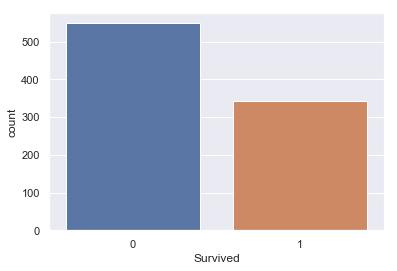

In [8]:
# 性別
sns.countplot('Survived',data=df)

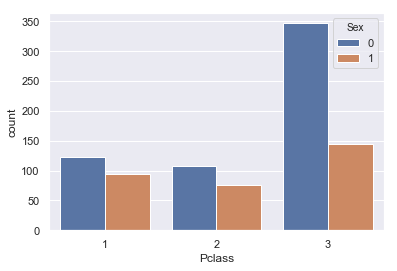

In [9]:
# 客室の種類別で人数
sns.countplot(df['Pclass'], data=df, hue='Sex')

In [10]:
# 部屋毎の生死
# sns.countplot(df_pred['Cabin_A'],data=df_pred, palette='winter_d', order=sorted(set(levels)), hue='Survived')

# 機械学習

In [11]:
# データ準備
from sklearn.model_selection import StratifiedKFold

X = df_pred
y = df['Survived']

# 項追加
X['FamilySize'] = (X['Parch'] + X['SibSp'] + 1)
# X.loc[(X['Cabin'].isnull() == 0), 'CabinClass'] = 1
# X.loc[(X['Cabin'].isnull()), 'CabinClass'] = 0

# 使わない項のそぎ落とし
del_column2 = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Fare', 'AgeClass']
del_column = del_column2.copy()
del_column.append('Survived')
X = X.drop(columns=del_column)

# StratifiedKFold
split = 5
ss = StratifiedKFold(n_splits=split, random_state=0, shuffle=True)
X.head()

,Pclass,Sex,Age,MotalityRate,FamilySize
0,3,0,22.0,8,2
1,1,1,38.0,4,2
2,3,1,26.0,8,1
3,1,1,35.0,4,2
4,3,0,35.0,8,1


In [31]:
# 数理モデル構築(決定木)
from sklearn.tree import DecisionTreeClassifier
depth = 5
clf = DecisionTreeClassifier(max_depth=depth,random_state=0)

score_sum = 0

for train_index, test_index in ss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf.fit(X_train, y_train)
    score_sum += clf.score(X_test, y_test)
    # print(clf.score(X_test, y_test))
    
print(f'Average Score: {score_sum/split}')

Average Score: 0.8271775846899073


In [32]:
# データ全体を使って再学習
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [33]:
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
depth = [5]
nest = [100]
clf2 = RandomForestClassifier(n_estimators=nest, max_depth=depth, random_state=0)
score_sum = 0

for d in depth:
    for n in nest:
        for train_index, test_index in ss.split(X, y):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y[train_index], y[test_index]
            clf2 = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=0)
            clf2.fit(X_train, y_train)
            score_sum += clf2.score(X_test, y_test)
            # print(clf.score(X_test, y_test))
        print(f'Average Score {d} {n}: {score_sum/split}')
        score_sum = 0

Average Score 5 100: 0.8215593943797883


In [34]:
clf2.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [35]:
# SVM
from sklearn import svm
X_svm = X.values.astype(np.int64)
y_svm = y.values
svm = svm.LinearSVC(C=0.7, intercept_scaling=1, multi_class='ovr' , loss="l1", penalty="l2", dual=True, random_state=0)

score_sum = 0

for train_index, test_index in ss.split(X_svm, y_svm):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    svm.fit(X_train, y_train)
    score_sum += svm.score(X_test, y_test)
    # print(svm.score(X_test, y_test))
    
print(f'Average Score: {score_sum/split}')

C:\Users\0175133\AppData\Local\Continuum\anaconda3\envs\py37\lib\site-packages\sklearn\svm\classes.py:220: DeprecationWarning: loss='l1' has been deprecated in favor of loss='hinge' as of 0.16. Backward compatibility for the loss='l1' will be removed in 1.0
  DeprecationWarning)


Average Score: 0.7833878941920082


In [36]:
svm.fit(X_svm, y_svm)

LinearSVC(C=0.7, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)

In [37]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
# lreg = LogisticRegression(C=10.0, penalty='l2', solver="sag", random_state=0)
lreg = LogisticRegression(C=10.0, random_state=0)

score_sum = 0
for train_index, test_index in ss.split(X, y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    lreg.fit(X_train, y_train)
    score_sum += lreg.score(X_test, y_test)
    # print(lreg.score(X_test, y_test))
    
print(f'Average Score: {score_sum/split}')

Average Score: 0.8115286367374557


In [38]:
# データ全体を使って再学習
lreg.fit(X, y)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
# テストデータの読み込み
X_test = pd.read_csv('data/test.csv')
X_test['Sex'] = X_test['Sex'].map({'male':0, 'female':1})
X_test = X_test.fillna({'Fare': X_test['Fare'].mean()})
X_test_pred = age_pred(X_test)

X_test_pred.loc[(X_test['Age'].isnull()), 'AgeClass'] = 1
X_test_pred.loc[(X_test['Age'].isnull() == 0), 'AgeClass'] = 0
X_test_pred['FamilySize'] = X_test_pred['Parch'] + X_test_pred['SibSp'] + 1

# キャビンのランク付け
levels = []
for level in X_test_pred['Cabin']:
    levels.append(str(level)[0])

X_test_pred['MotalityRate'] = levels
X_test_pred['MotalityRate'] = X_test_pred['MotalityRate'].map({'D':0, 'E':1, 'B':2, 'F':3, 'C':4, 'G':5, 'A':6, 'T':7, 'n':8})

X_test_pred = X_test_pred.drop(columns=del_column2)
# X_test_pred.isnull().sum()
X_test_pred.head()

,Pclass,Sex,Age,FamilySize,MotalityRate
0,3,0,34.5,1,8
1,3,1,47.0,2,8
2,2,0,62.0,1,8
3,3,0,27.0,1,8
4,3,1,22.0,3,8


In [40]:
# モデルから予測
y_pred_dt = clf.predict(X_test_pred)
y_pred_rf = clf2.predict(X_test_pred)
y_pred_svm = svm.predict(X_test_pred)
y_pred_reg = lreg.predict(X_test_pred)

# 保存
titanic_dt = pd.DataFrame({'PassengerId': X_test['PassengerId'],'Survived': y_pred_dt})
titanic_dt.to_csv('data/gender_submission_dt.csv', index=False)
titanic_rf = pd.DataFrame({'PassengerId': X_test['PassengerId'],'Survived': y_pred_rf})
titanic_rf.to_csv('data/gender_submission_rf.csv', index=False)
titanic_svm = pd.DataFrame({'PassengerId': X_test['PassengerId'],'Survived': y_pred_svm})
titanic_svm.to_csv('data/gender_submission_svm.csv', index=False)
titanic_reg = pd.DataFrame({'PassengerId': X_test['PassengerId'],'Survived': y_pred_reg})
titanic_reg.to_csv('data/gender_submission_reg.csv', index=False)

In [42]:
# アンサンブル
sub_dt = pd.read_csv('data/gender_submission_dt.csv')
sub_rf = pd.read_csv('data/gender_submission_rf.csv')
sub_svm = pd.read_csv('data/gender_submission_svm.csv')
sub_reg = pd.read_csv('data/gender_submission_reg.csv')

sub = pd.DataFrame(pd.read_csv('data/gender_submission.csv')['PassengerId'])
sub['Survived'] = sub_dt['Survived'] + sub_rf['Survived'] + sub_svm['Survived']
#+ sub_reg['Survived']
sub['Survived'] = (sub['Survived'] >= 3).astype(int)
sub.to_csv('data/gender_submission_ens.csv', index = False)

# 評価

In [43]:
# 混同行列
from sklearn.metrics import confusion_matrix
y_dt = clf.predict(X)
y_rf = clf2.predict(X)
y_svm = svm.predict(X)
y_reg = lreg.predict(X)
print(confusion_matrix(y, y_dt))
print(confusion_matrix(y, y_rf))
print(confusion_matrix(y, y_svm))
print(confusion_matrix(y, y_reg))

[[504  45]
 [ 84 258]]
[[496  53]
 [ 79 263]]
[[457  92]
 [ 90 252]]
[[479  70]
 [ 92 250]]


In [44]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y, y_dt))
print(accuracy_score(y, y_rf))
print(accuracy_score(y, y_svm))
print(accuracy_score(y, y_reg))

0.8552188552188552
0.8518518518518519
0.7957351290684624
0.8181818181818182


In [45]:
from sklearn.metrics import precision_score
print(precision_score(y, y_dt))
print(precision_score(y, y_rf))
print(precision_score(y, y_svm))
print(precision_score(y, y_reg))

0.8514851485148515
0.8322784810126582
0.7325581395348837
0.78125


In [46]:
from sklearn.metrics import recall_score
print(recall_score(y, y_dt))
print(recall_score(y, y_rf))
print(recall_score(y, y_svm))
print(recall_score(y, y_reg))

0.7543859649122807
0.7690058479532164
0.7368421052631579
0.7309941520467836


In [47]:
from sklearn.metrics import log_loss
print(log_loss(y, clf.predict_proba(X)))
print(log_loss(y, clf2.predict_proba(X)))
# print(log_loss(y, svm.predict_proba(X)))
print(log_loss(y, lreg.predict_proba(X)))

0.35684434921431646
0.36534924269298646
0.43603618690926105
